In [1]:
import seaborn as sns
import pandas as pd
sns.set_style("whitegrid")

In [2]:
path = "Z:/JulietteG/6-Etutes_Antares/BP23_A_EU_Xeq_socle_thermique_2041_postcalage_marg98_stock_FR_EU/user"

In [3]:
suf = ''

# Facteur de charge annuel

In [4]:
df = pd.read_excel(path+"/facteur_de_charge"+suf+".xlsx")
df.dropna(inplace=True)

In [12]:
# df["other"] = df["name"].apply(lambda x:x.split("other_")[1].split("_")[-1] if ("other" in x and "fc" not in x) else "heuristic" if x=="vu_r" else (x.split("other_")[1].split("_")[0] if "fc" in x else "vu"))
# df["sim"] = df["name"].apply(lambda x:x.split("sim")[0].split("_")[-1] if ("sim" in x) and ("initial" not in x) else "5" if x=="vu_r" else x.split("_")[0])
df["Type cible"] = df["name"].apply(lambda x:"Moyen" if x=="vu_r" else ("Exact" if "exact" in x else "Moyen" if (("vu" in x or "fc" in x) and "free" not in x) else "Non appliquable"))
# df["Cible"] = df["name"].apply(lambda x:x.split("_")[0][2:] if ("fc" in x) else ("60" if "vu_" in x else ("40" if "initial" in x else "free")))
df["sim"] = df["name"].apply(lambda x:{"heuristique":"Heuristique","free":"Free","initial_simulation":"Initial"}[x] if x in ['initial_simulation', 'heuristique', 'free'] else ("Fc global" if "5sim" in x else "Fc zonal"))
df["Type_sim"] = df["sim"]+df["Type cible"].apply(lambda x:"_"+x if x!="Non appliquable" else "")
df["Scénario"] = df["mcYear"].apply(lambda x:str(x))
df["Facteur de charge annuel"] = df["fc"]


In [13]:
df["name"].unique()

array(['initial_simulation',
       'fc40_5simbisheur_other_vu_exact_pen200_untilconvergence',
       'fc40_5simbisheur_other_vu_mean_pen0_untilconvergence',
       'vu_exact_fc40', 'vu_mean_fc40', 'heuristique', 'free'],
      dtype=object)

In [14]:
df[df.mcYear==11]

,mcYear,zone,charge,capa,fc,name,Type cible,sim,Type_sim,Scénario,Facteur de charge annuel
0,11,est_eu,250908521,5.405837e+08,0.464144,initial_simulation,Non appliquable,Initial,Initial,11,0.464144
1,11,fr,88506381,1.782400e+08,0.496557,initial_simulation,Non appliquable,Initial,Initial,11,0.496557
2,11,it,15913219,9.302966e+07,0.171055,initial_simulation,Non appliquable,Initial,Initial,11,0.171055
3,11,scandinavie,58709741,1.846616e+08,0.317932,initial_simulation,Non appliquable,Initial,Initial,11,0.317932
40,11,est_eu,245189032,5.405837e+08,0.453564,fc40_5simbisheur_other_vu_exact_pen200_untilco...,Exact,Fc global,Fc global_Exact,11,0.453564
41,11,fr,84860100,1.782400e+08,0.476100,fc40_5simbisheur_other_vu_exact_pen200_untilco...,Exact,Fc global,Fc global_Exact,11,0.476100
42,11,it,11754496,9.302966e+07,0.126352,fc40_5simbisheur_other_vu_exact_pen200_untilco...,Exact,Fc global,Fc global_Exact,11,0.126352
43,11,scandinavie,56976145,1.846616e+08,0.308544,fc40_5simbisheur_other_vu_exact_pen200_untilco...,Exact,Fc global,Fc global_Exact,11,0.308544
80,11,est_eu,241013144,5.405837e+08,0.445839,fc40_5simbisheur_other_vu_mean_pen0_untilconve...,Moyen,Fc global,Fc global_Moyen,11,0.445839
81,11,fr,84985038,1.782400e+08,0.476801,fc40_5simbisheur_other_vu_mean_pen0_untilconve...,Moyen,Fc global,Fc global_Moyen,11,0.476801


In [15]:
df_global = df[["name","charge","capa","mcYear"]].groupby(["name","mcYear"]).sum().reset_index()
df_global["fc"] = df_global["charge"]/df_global["capa"]
df_global[["name","fc"]].groupby(["name"]).mean()

,fc
name,
fc40_5simbisheur_other_vu_exact_pen200_untilconvergence,0.400604
fc40_5simbisheur_other_vu_mean_pen0_untilconvergence,0.366279
free,0.333943
heuristique,0.399985
initial_simulation,0.391202
vu_exact_fc40,0.399106
vu_mean_fc40,0.427369


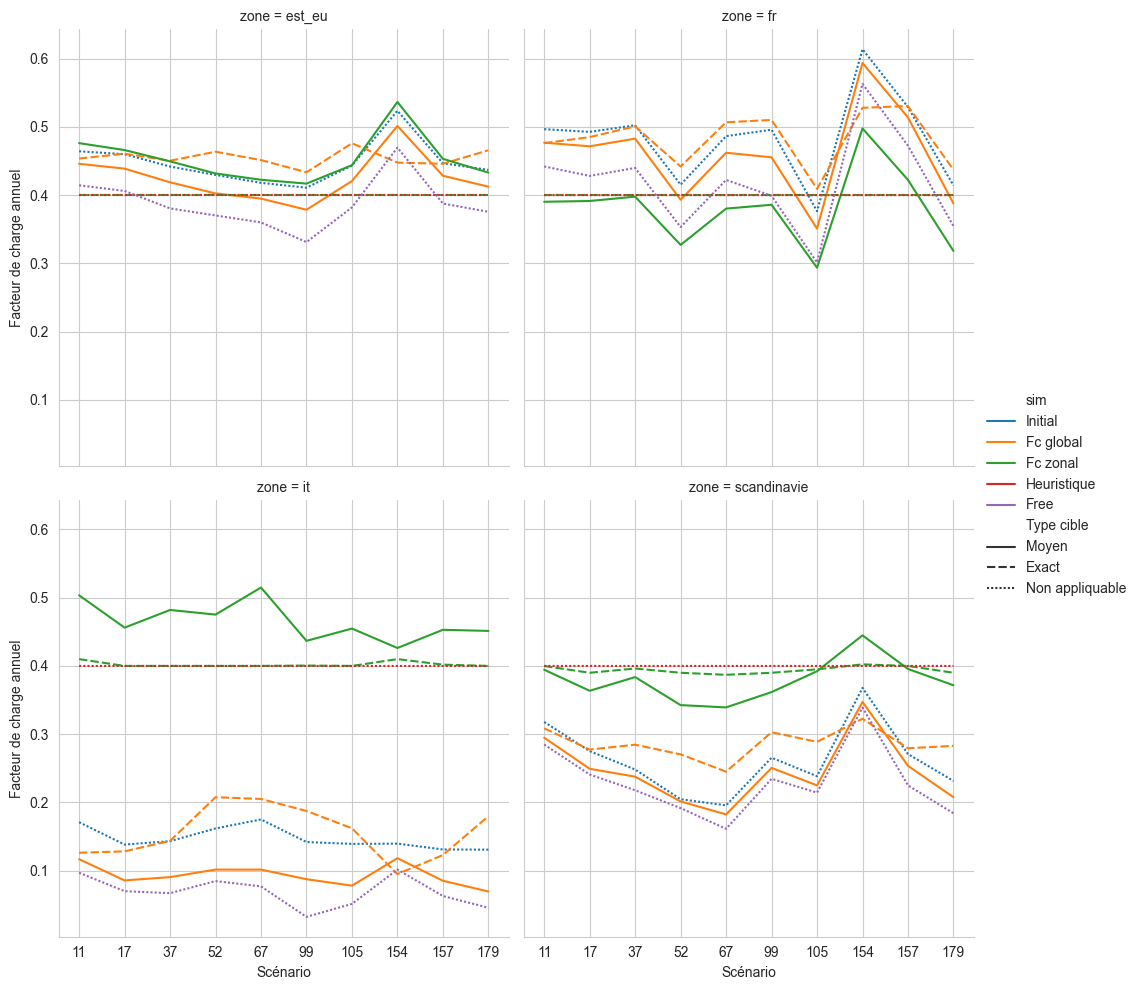

In [16]:
sns.relplot(x="Scénario", y="Facteur de charge annuel",
             style="Type cible", hue="sim",style_order=['Moyen', 'Exact',"Non appliquable"],
             data=df,kind="line",col="zone",col_wrap=2)

# Facteur de charge hebdo

In [17]:
df = pd.read_excel(path+"/facteur_de_charge_hebdo"+suf+".xlsx")
df.dropna(inplace=True)

In [18]:
df["Type cible"] = df["name"].apply(lambda x:"Moyen" if x=="vu_r" else ("Exact" if "exact" in x else "Moyen" if (("vu" in x or "fc" in x) and "free" not in x) else "Non appliquable"))
df["sim"] = df["name"].apply(lambda x:{"heuristique":"Heuristique","free":"Free","initial_simulation":"Initial"}[x] if x in ['initial_simulation', 'heuristique', 'free'] else ("Fc global" if "5sim" in x else "Fc zonal"))
df["Type_sim"] = df["sim"]+df["Type cible"].apply(lambda x:"_"+x if x!="Non appliquable" else "")
df["Scénario"] = df["mcYear"].apply(lambda x:str(x))
df["Semaine"] = df["week"]
df["Facteur de charge hebdomadaire"] = df["fc_direct"]

In [19]:
df[(df.mcYear==11)&(df.week==0)]

,mcYear,week,zone,charge,capa_direct,fc_direct,name,Type cible,sim,Type_sim,Scénario,Semaine,Facteur de charge hebdomadaire
0,11,0,est_eu,3790241,1.039584e+07,0.364592,initial_simulation,Non appliquable,Initial,Initial,11,0,0.364592
1,11,0,fr,1370330,3.427692e+06,0.399782,initial_simulation,Non appliquable,Initial,Initial,11,0,0.399782
2,11,0,it,505062,1.789032e+06,0.282310,initial_simulation,Non appliquable,Initial,Initial,11,0,0.282310
3,11,0,scandinavie,1263667,3.551184e+06,0.355844,initial_simulation,Non appliquable,Initial,Initial,11,0,0.355844
2600,11,0,est_eu,3610536,1.039584e+07,0.347306,fc40_5simbisheur_other_vu_exact_pen200_untilco...,Exact,Fc global,Fc global_Exact,11,0,0.347306
2601,11,0,fr,1171271,3.427692e+06,0.341708,fc40_5simbisheur_other_vu_exact_pen200_untilco...,Exact,Fc global,Fc global_Exact,11,0,0.341708
2602,11,0,it,363171,1.789032e+06,0.202999,fc40_5simbisheur_other_vu_exact_pen200_untilco...,Exact,Fc global,Fc global_Exact,11,0,0.202999
2603,11,0,scandinavie,1164941,3.551184e+06,0.328043,fc40_5simbisheur_other_vu_exact_pen200_untilco...,Exact,Fc global,Fc global_Exact,11,0,0.328043
5200,11,0,est_eu,3608505,1.039584e+07,0.347110,fc40_5simbisheur_other_vu_mean_pen0_untilconve...,Moyen,Fc global,Fc global_Moyen,11,0,0.347110
5201,11,0,fr,1174279,3.427692e+06,0.342586,fc40_5simbisheur_other_vu_mean_pen0_untilconve...,Moyen,Fc global,Fc global_Moyen,11,0,0.342586


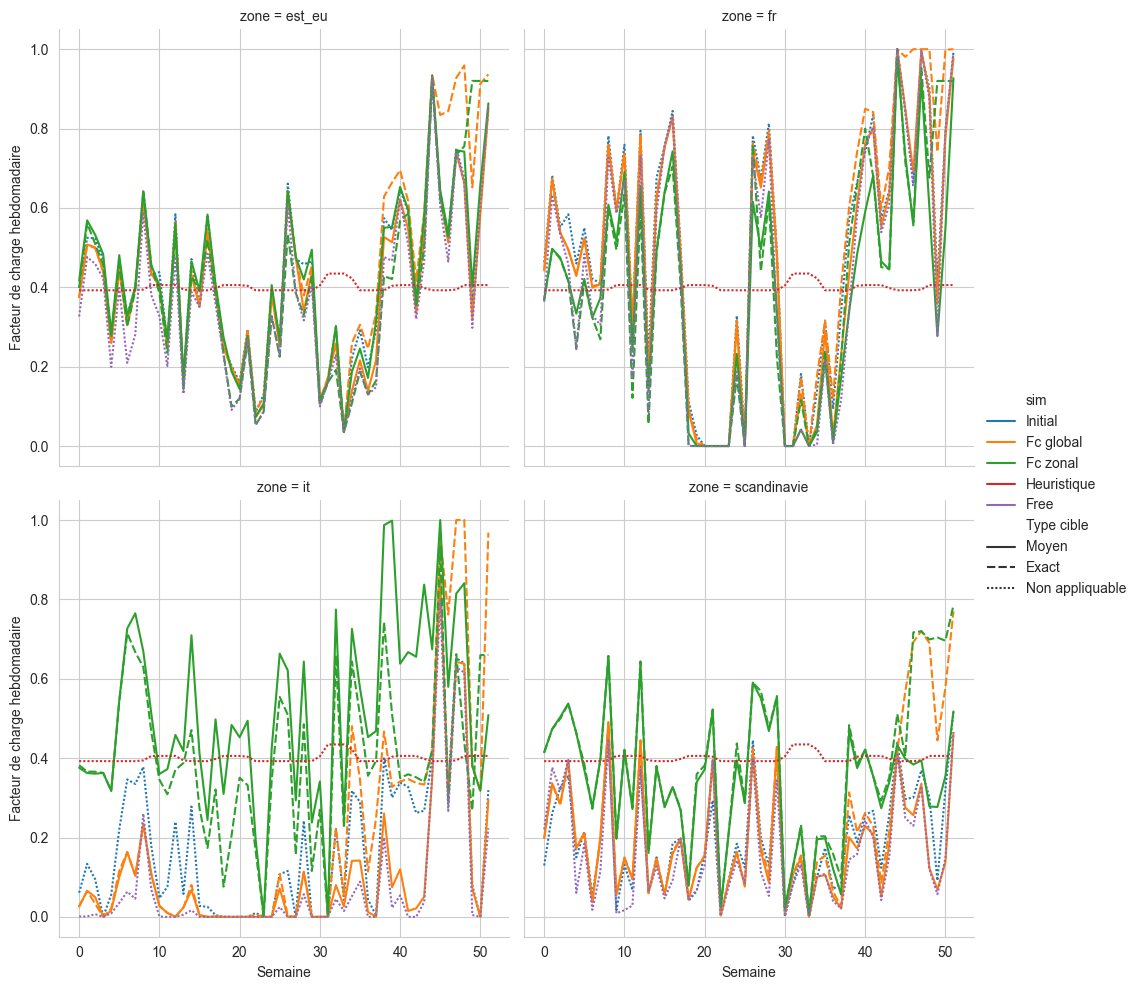

In [20]:
sns.relplot(x="Semaine", y="Facteur de charge hebdomadaire",
style="Type cible", hue="sim",
data=df[(df["Scénario"]=="67")],kind="line",style_order=['Moyen', 'Exact',"Non appliquable"],col="zone",col_wrap=2)

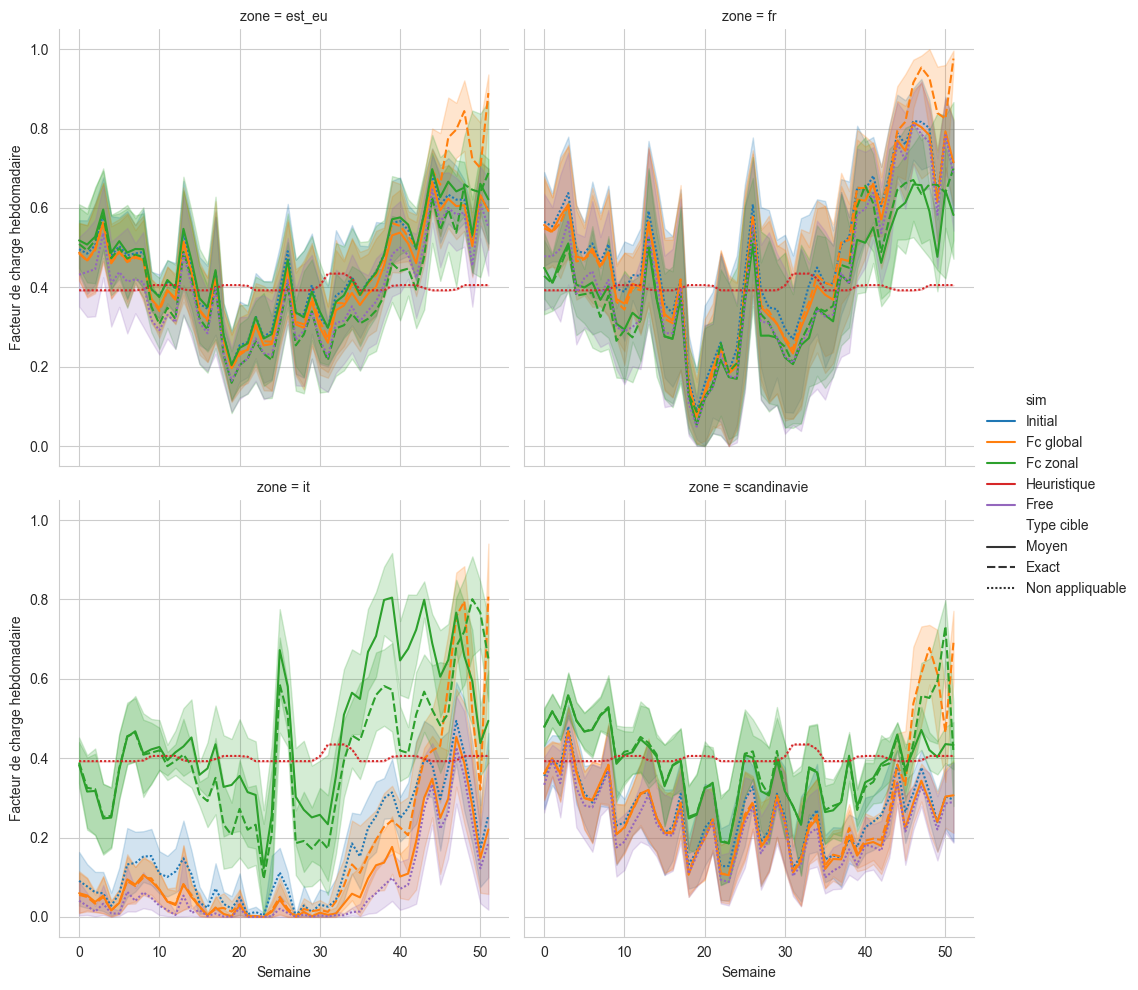

In [21]:
sns.relplot(x="Semaine", y="Facteur de charge hebdomadaire",style="Type cible", hue="sim",data=df,kind="line",style_order=['Moyen', 'Exact',"Non appliquable"],col="zone",col_wrap=2)

# Coûts annuels

In [22]:
df_1 = pd.read_excel(path+"/coûts"+suf+".xlsx")
df_2 = pd.read_excel(path+"/facteur_de_charge"+suf+".xlsx")
df_global = df_2[["name","charge","capa","mcYear"]].groupby(["name","mcYear"]).sum().reset_index()
df_global["fc"] = df_global["charge"]/df_global["capa"]
df = pd.merge(df_global,df_1, on=["name","mcYear"])
df.dropna(inplace=True)

In [23]:
df["Type cible"] = df["name"].apply(lambda x:"Moyen" if x=="vu_r" else ("Exact" if "exact" in x else "Moyen" if (("vu" in x or "fc" in x) and "free" not in x) else "Non appliquable"))
df["sim"] = df["name"].apply(lambda x:{"heuristique":"Heuristique","free":"Free","initial_simulation":"Initial"}[x] if x in ['initial_simulation', 'heuristique', 'free'] else ("Fc global" if "5sim" in x else "Fc zonal"))
df["Type_sim"] = df["sim"]+df["Type cible"].apply(lambda x:"_"+x if x!="Non appliquable" else "")
df["Scénario"] = df["mcYear"].apply(lambda x:str(x))


In [24]:
df[df.mcYear==11]

,name,mcYear,charge,capa,fc,ov_cost,unsp_cost,Type cible,sim,Type_sim,Scénario
0,fc40_5simbisheur_other_vu_exact_pen200_untilco...,11,398779773,9.965149e+08,0.400174,88883647767,129072975,Exact,Fc global,Fc global_Exact,11
10,fc40_5simbisheur_other_vu_mean_pen0_untilconve...,11,391323815,9.965149e+08,0.392692,88565043053,129072977,Moyen,Fc global,Fc global_Moyen,11
20,free,11,364388617,9.965149e+08,0.365663,88550581974,172487242,Non appliquable,Free,Free,11
30,heuristique,11,398590761,9.965149e+08,0.399985,95412741066,172487177,Non appliquable,Heuristique,Heuristique,11
40,initial_simulation,11,414037862,9.965149e+08,0.415486,89029067565,50008698,Non appliquable,Initial,Initial,11
50,vu_exact_fc40,11,399516340,9.965149e+08,0.400914,89639167317,172487173,Exact,Fc zonal,Fc zonal_Exact,11
60,vu_mean_fc40,11,446598533,9.965149e+08,0.448160,90367182402,172487250,Moyen,Fc zonal,Fc zonal_Moyen,11


In [25]:
df_mean = df[["name","ov_cost","fc"]].groupby(["name"]).mean().reset_index(drop=False)
df_mean["Type cible"] = df_mean["name"].apply(lambda x:"Moyen" if x=="vu_r" else ("Exact" if "exact" in x else "Moyen" if (("vu" in x or "fc" in x) and "free" not in x) else "Non appliquable"))
df_mean["sim"] = df_mean["name"].apply(lambda x:{"heuristique":"Heuristique","free":"Free","initial_simulation":"Initial"}[x] if x in ['initial_simulation', 'heuristique', 'free'] else ("Fc global" if "5sim" in x else "Fc zonal"))
df_mean["Type_sim"] = df_mean["sim"]+df_mean["Type cible"].apply(lambda x:"_"+x if x!="Non appliquable" else "")
df_mean["Facteur de charge annuel moyen"] = df_mean["fc"]
df_mean["Coût annuel moyen"] = df_mean["ov_cost"]

In [26]:
df_mean

,name,ov_cost,fc,Type cible,sim,Type_sim,Facteur de charge annuel moyen,Coût annuel moyen
0,fc40_5simbisheur_other_vu_exact_pen200_untilco...,9.517001e+10,0.400604,Exact,Fc global,Fc global_Exact,0.400604,9.517001e+10
1,fc40_5simbisheur_other_vu_mean_pen0_untilconve...,9.361806e+10,0.366279,Moyen,Fc global,Fc global_Moyen,0.366279,9.361806e+10
2,free,9.362418e+10,0.333943,Non appliquable,Free,Free,0.333943,9.362418e+10
3,heuristique,1.026445e+11,0.399985,Non appliquable,Heuristique,Heuristique,0.399985,1.026445e+11
4,initial_simulation,9.429581e+10,0.391202,Non appliquable,Initial,Initial,0.391202,9.429581e+10
5,vu_exact_fc40,9.584849e+10,0.399106,Exact,Fc zonal,Fc zonal_Exact,0.399106,9.584849e+10
6,vu_mean_fc40,9.572423e+10,0.427369,Moyen,Fc zonal,Fc zonal_Moyen,0.427369,9.572423e+10


<Axes: xlabel='Facteur de charge annuel moyen', ylabel='Coût annuel moyen'>

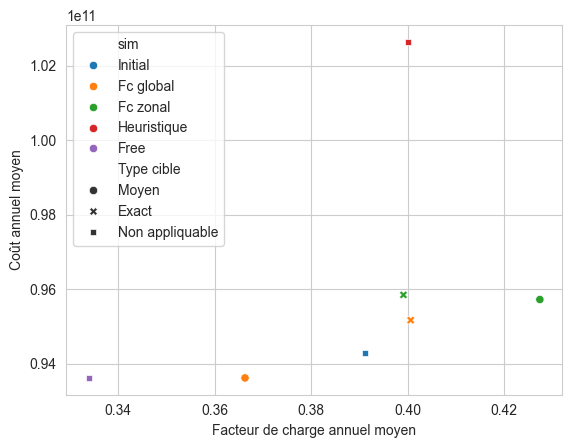

In [27]:
sns.scatterplot(x="Facteur de charge annuel moyen",y="Coût annuel moyen",
             hue="sim", style="Type cible",style_order=['Moyen', 'Exact',"Non appliquable"],hue_order=["Initial","Fc global","Fc zonal","Heuristique","Free"],data=df_mean)

# Facteur de charge par pays

In [28]:
df = pd.read_excel(path+"/facteur_de_charge_pays"+suf+".xlsx")
df.dropna(inplace=True)

In [29]:
df["Type cible"] = df["name"].apply(lambda x:"Moyen" if x=="vu_r" else ("Exact" if "exact" in x else "Moyen" if (("vu" in x or "fc" in x) and "free" not in x) else "Non appliquable"))
df["sim"] = df["name"].apply(lambda x:{"heuristique":"Heuristique","free":"Free","initial_simulation":"Initial"}[x] if x in ['initial_simulation', 'heuristique', 'free'] else ("Fc global" if "5sim" in x else "Fc zonal"))
df["Type_sim"] = df["sim"]+df["Type cible"].apply(lambda x:"_"+x if x!="Non appliquable" else "")

In [30]:
df[df.mcYear==11]

,link,mcYear,charge,capa_direct,from,to,zone,fc_zone,name,Type cible,sim,Type_sim
0,at - z_p2g_marg,11,3721979,21385728.0,at,z_p2g_marg,est_eu,0.174040,initial_simulation,Non appliquable,Initial,Initial
10,be - z_p2g_marg,11,2806983,7303296.0,be,z_p2g_marg,est_eu,0.384345,initial_simulation,Non appliquable,Initial,Initial
20,ch - z_p2g_marg,11,958393,3485664.0,ch,z_p2g_marg,est_eu,0.274953,initial_simulation,Non appliquable,Initial,Initial
30,de - z_p2g_marg,11,43002515,152539296.0,de,z_p2g_marg,est_eu,0.281911,initial_simulation,Non appliquable,Initial,Initial
40,dke - z_p2g_marg,11,4800931,10028928.0,dke,z_p2g_marg,scandinavie,0.478708,initial_simulation,Non appliquable,Initial,Initial
...,...,...,...,...,...,...,...,...,...,...,...,...
1700,se1 - z_p2g_marg,11,14004738,98157696.0,se1,z_p2g_marg,scandinavie,0.142676,free,Non appliquable,Free,Free
1710,se2 - z_p2g_marg,11,2548743,3686592.0,se2,z_p2g_marg,scandinavie,0.691355,free,Non appliquable,Free,Free
1720,se3 - z_p2g_marg,11,7112812,12090624.0,se3,z_p2g_marg,scandinavie,0.588292,free,Non appliquable,Free,Free
1730,se4 - z_p2g_marg,11,1962798,3660384.0,se4,z_p2g_marg,scandinavie,0.536227,free,Non appliquable,Free,Free


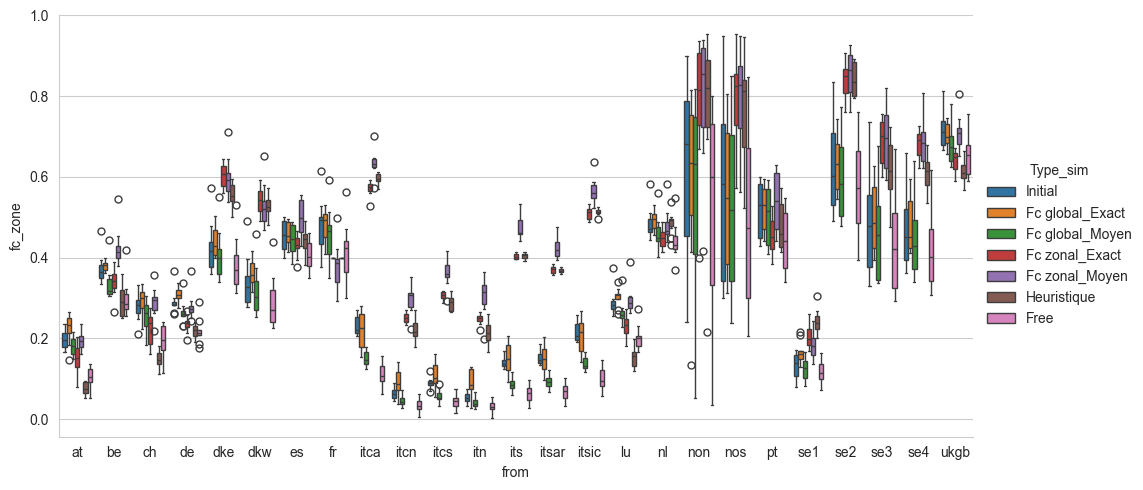

In [31]:
sns.catplot(x="from", y="fc_zone",
             hue="Type_sim",
             data=df,kind="box",aspect=2,height=5)